Problem statement:
The Big Market have collected sales for different products across 10 stores and need to build a predictive model to know the properties of these products and then, improve its sales as the model prediction results. We will use a regression model to solve this problem and enhance the trend of products sales across the different stores. The Objective of the problem is to aid the market enhancing its sales across the time and expected results is a relation between the different features collected and be powerful model. 

In [1]:
##Loading Packages and Data

# data manipulation
from optparse import Values
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt

import seaborn as sns

import fuzzywuzzy
from fuzzywuzzy import process
import chardet


#read the data
Data= pd.read_csv("Train.csv")
test_data=pd.read_csv("Test.csv")






# set seed for reproducibility
np.random.seed(0) 

In [2]:
#Data structure and content
print(Data.head())

Data.duplicated().sum()   #check if there are any duplicated rows
Data.info()
Data.describe()
Data.shape





  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

(8523, 12)

from the describtion of the numerical data.........> there're outliers with huge std  in the item mpr and item_outlet_sales so we should deal with these outliers later on in the filtration and cleaning.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

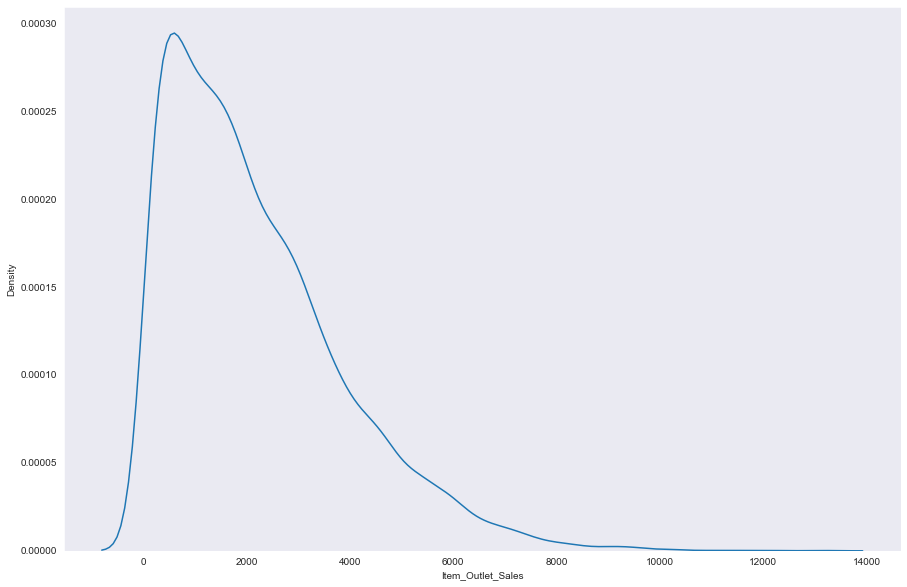

In [3]:
#univariate analysis
plt.figure(figsize=(15,10))
sns.set_style('dark')
sns.kdeplot(data=Data['Item_Outlet_Sales'])

#most of the sales -----> less than 4000 and the highst density around 2000

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Count'>

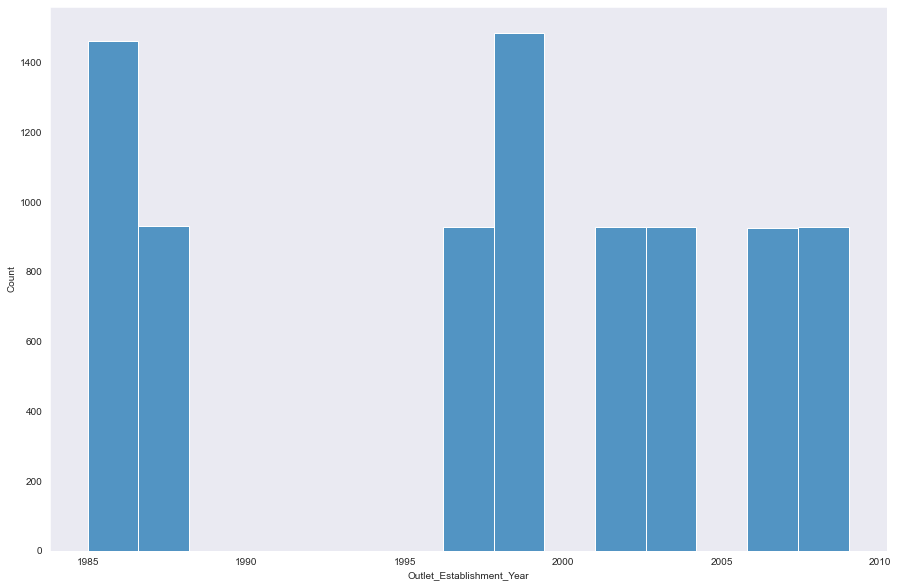

In [4]:
plt.figure(figsize=(15,10))
sns.histplot(data=Data['Outlet_Establishment_Year'])    # almost we haven't any data across 1990 t0 1995 

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

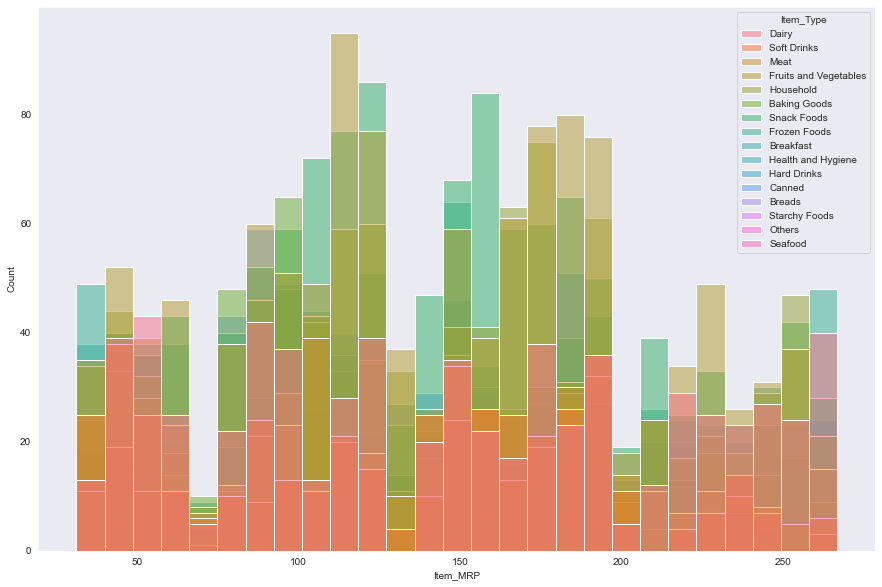

In [5]:
plt.figure(figsize=(15,10))
sns.histplot(data=Data, x='Item_MRP', hue='Item_Type')   # most mpr for baking goods , Dairy and household and snack foods


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

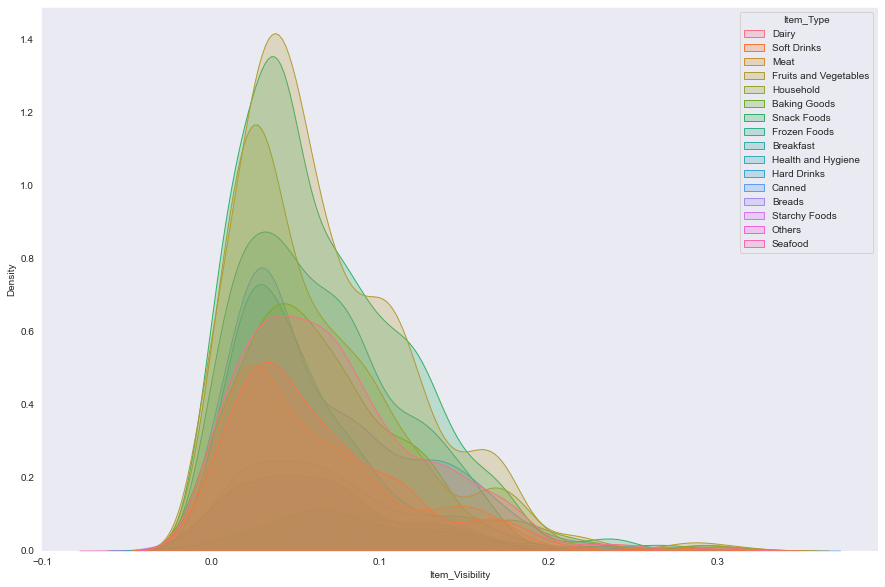

In [6]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=Data, x='Item_Visibility', hue='Item_Type', shade=True)    #most visibilty items are meat, fruits and vegetables and baking goods 


Let's start with Bivariate analyis and try to undarstand the correlation between the attributes


c:\Users\Start\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Start\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

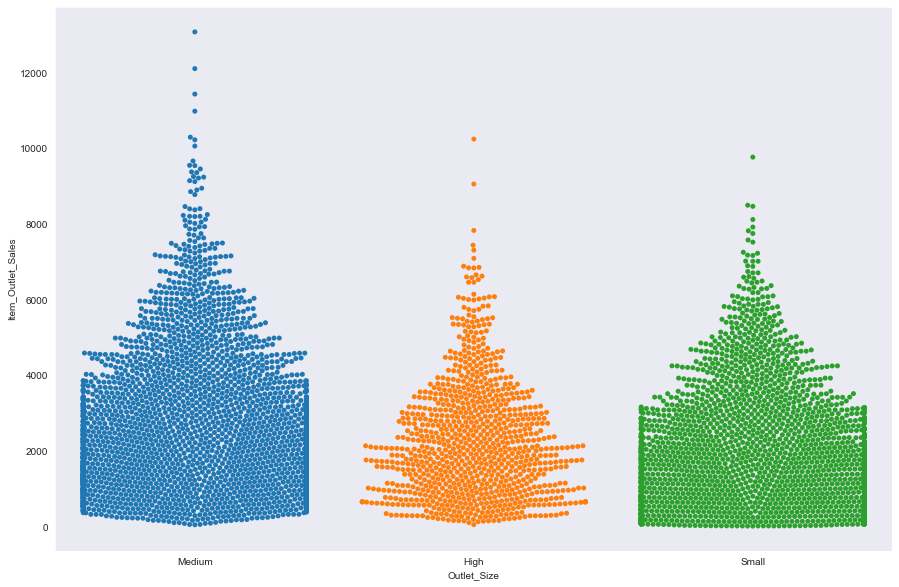

In [7]:
#the relation betwwen outlet_size and the sales shows that most of data is medium and now we must guess the Nan values
plt.figure(figsize=(15,10))
sns.swarmplot(x=Data['Outlet_Size'],y=Data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

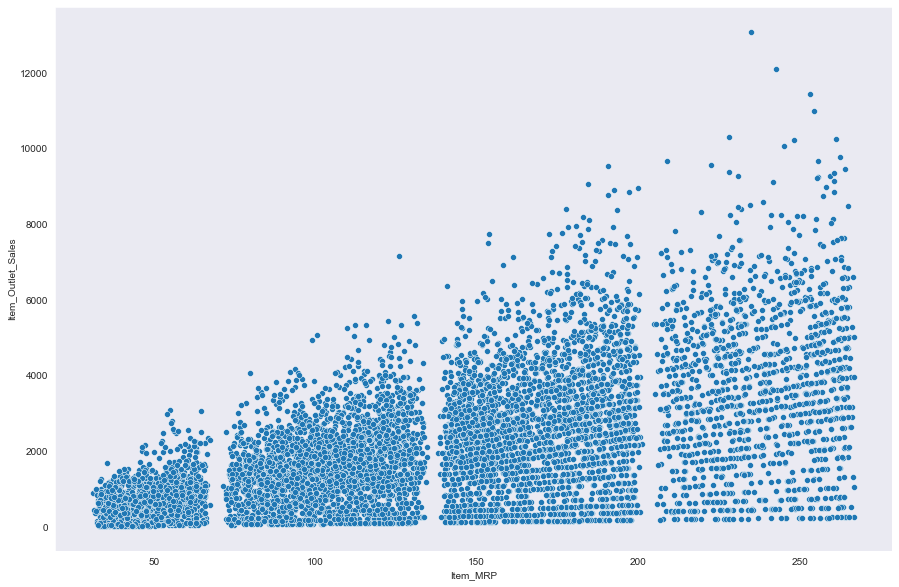

In [8]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=Data['Item_MRP'], y=Data['Item_Outlet_Sales'])    #positive correlation between mpr and sales

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

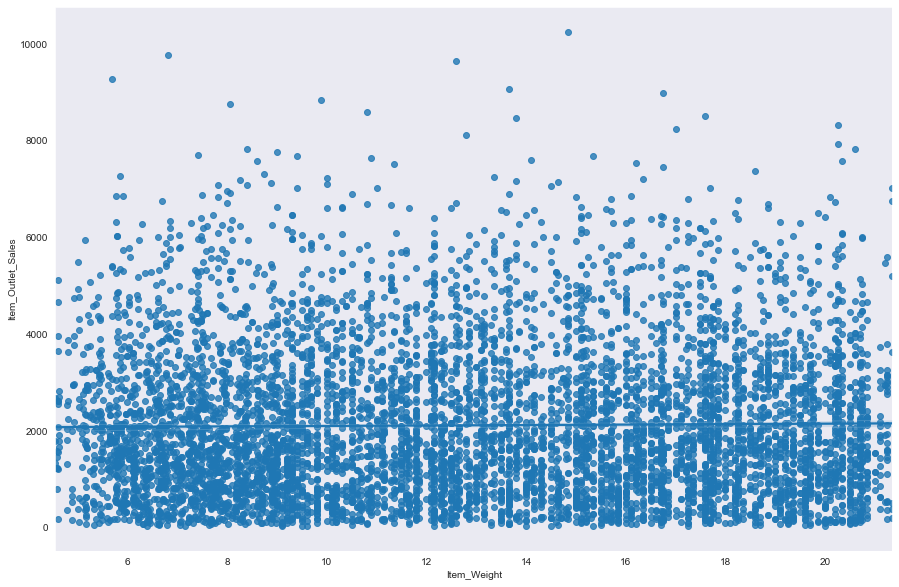

In [9]:
plt.figure(figsize=(15,10))
sns.regplot(x=Data['Item_Weight'], y=Data['Item_Outlet_Sales'])  

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

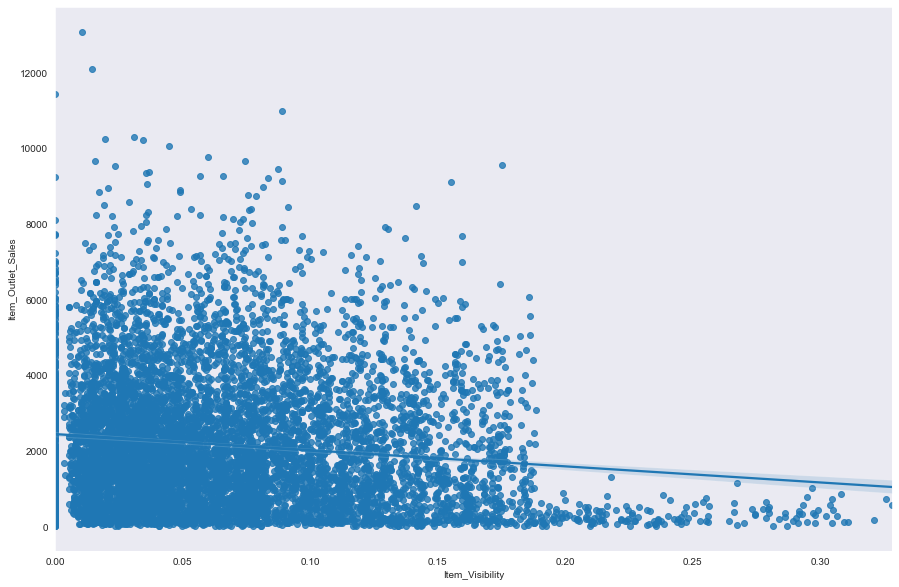

In [10]:
plt.figure(figsize=(15,10))
sns.regplot(x=Data['Item_Visibility'], y=Data['Item_Outlet_Sales'])  #negative correlation between item visibility and sale

#Data Cleaning
missing data treatment

In [11]:

missing_Data_Count=Data.isnull().sum()
print(missing_Data_Count)     #  1463 null data in the item_weight and 2410 missing in the outlet_size
Total_Data=np.product(Data.shape)
missing_Data_num=missing_Data_Count.sum()
missing_Percentage=(missing_Data_num/Total_Data)*100
missing_Percentage



Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


3.786812155344362

In [12]:
missing_data_count_test=test_data.isnull().sum()
print(missing_data_count_test)

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [13]:
#filling the missing data of item weight with medium value mean
updated_df = Data
updated_df['Item_Weight']=updated_df['Item_Weight'].fillna(updated_df['Item_Weight'].mean())
updated_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
#filling the missing test data of item weight with medium value mean
updated_test=test_data
updated_test['Item_Weight']=updated_test['Item_Weight'].fillna(updated_df['Item_Weight'].mean())
updated_test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [18]:
#filling the NaNs of outlet_size using categorical imputer of numpy

# handling NaN values
#creates a random permuation of the categorical values
permutation = np.random.permutation(updated_df['Outlet_Size'])

#erase the empty values
empty_is = np.where(permutation == "")
permutation = np.delete(permutation, empty_is)

#replace all empty values of the dataframe[field]
end = len(permutation)
updated_df['Outlet_Size'] = updated_df['Outlet_Size'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
#filling the NaNs of outlet_size test_data using categorical imputer of numpy

# handling NaN values
#creates a random permuation of the categorical values
permutation = np.random.permutation(updated_test['Outlet_Size'])

#erase the empty values
empty_is = np.where(permutation == "")
permutation = np.delete(permutation, empty_is)

#replace all empty values of the dataframe[field]
end = len(permutation)
updated_test['Outlet_Size'] = updated_test['Outlet_Size'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)
updated_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [23]:
#..................check inconsistent data

#a function to convert both lower and white spaces
def convert_lower_spaces(df,column):
    df[column] =df[column].str.lower()
    df[column] =df[column].str.strip()
    
# convert to lower case & white spaces for train data
convert_lower_spaces(updated_df,'Item_Fat_Content')
convert_lower_spaces(updated_df,'Item_Type')
convert_lower_spaces(updated_df,'Outlet_Identifier')
convert_lower_spaces(updated_df,'Outlet_Size')
convert_lower_spaces(updated_df,'Outlet_Location_Type')
convert_lower_spaces(updated_df,'Outlet_Type')


#unique columns to check the repetition of words meaning
item_type=updated_df['Outlet_Type'].unique()     #dooone 
item_type.sort()
#item_type

Outlet_Location_Type=updated_df['Outlet_Location_Type'].unique()   #dooone 
Outlet_Location_Type.sort()
#Outlet_Location_Type

item_fat_content=updated_df['Item_Fat_Content'].unique()   #  low fat and lf are the same &   reg and regular are the same so, let's rename it to be the same meanning   
item_fat_content.sort()
#item_fat_content

updated_data=updated_df.copy()
updated_data['Item_Fat_Content'] = updated_data['Item_Fat_Content'].replace(['lf','reg'],['low fat','regular'])

#check that now i have that column unique
item_fat_content=updated_data['Item_Fat_Content'].unique()    
item_fat_content.sort()
item_fat_content   ##done now unique

array(['low fat', 'regular'], dtype=object)

In [24]:

# convert to lower case & white space
convert_lower_spaces(updated_test,'Item_Fat_Content')
convert_lower_spaces(updated_test,'Item_Type')
convert_lower_spaces(updated_test,'Outlet_Identifier')
convert_lower_spaces(updated_test,'Outlet_Size')
convert_lower_spaces(updated_test,'Outlet_Location_Type')
convert_lower_spaces(updated_test,'Outlet_Type')


test_updated=updated_test.copy()
test_updated['Item_Fat_Content'] = test_updated['Item_Fat_Content'].replace(['lf','reg'],['low fat','regular'])

#check that now i have that column unique
item_fat_content=test_updated['Item_Fat_Content'].unique()    
item_fat_content.sort()
item_fat_content   ##done now unique
test_updated



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,low fat,0.007565,snack foods,107.8622,out049,1999,medium,tier 1,supermarket type1
1,FDW14,8.300000,regular,0.038428,dairy,87.3198,out017,2007,small,tier 2,supermarket type1
2,NCN55,14.600000,low fat,0.099575,others,241.7538,out010,1998,high,tier 3,grocery store
3,FDQ58,7.315000,low fat,0.015388,snack foods,155.0340,out017,2007,medium,tier 2,supermarket type1
4,FDY38,12.857645,regular,0.118599,dairy,234.2300,out027,1985,medium,tier 3,supermarket type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,regular,0.013496,snack foods,141.3154,out046,1997,small,tier 1,supermarket type1
5677,FDD47,7.600000,regular,0.142991,starchy foods,169.1448,out018,2009,medium,tier 3,supermarket type2
5678,NCO17,10.000000,low fat,0.073529,health and hygiene,118.7440,out045,2002,medium,tier 2,supermarket type1
5679,FDJ26,15.300000,regular,0.000000,canned,214.6218,out017,2007,high,tier 2,supermarket type1


#outliers deletion

c:\Users\Start\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

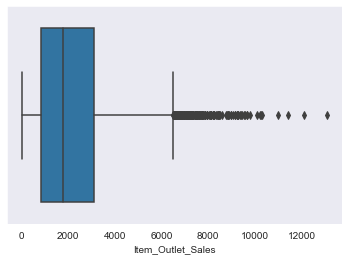

In [25]:

sns.boxplot(updated_data['Item_Outlet_Sales'])


In [26]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(updated_data, "Item_Outlet_Sales")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

def remove_outliers(upper,lower,column,df):
    updatedd_data_one = df[(df[column] > lower) & (df[column] < upper)]
    return updatedd_data_one 

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


In [27]:
#let's take look at outliers
updated_data[(updated_data['Item_Outlet_Sales'] < lower) | (updated_data['Item_Outlet_Sales'] > upper)]
#remove these outliers of Item_outlet_sales from dataset
updated_data_one=remove_outliers(upper,lower,'Item_Outlet_Sales',updated_data)
#updated_data_one = updated_data[(updated_data['Item_Outlet_Sales'] > lower) & (updated_data['Item_Outlet_Sales'] < upper)]
updated_data_one

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,dairy,249.8092,out049,1999,medium,tier 1,supermarket type1,3735.1380
1,DRC01,5.920,regular,0.019278,soft drinks,48.2692,out018,2009,medium,tier 3,supermarket type2,443.4228
2,FDN15,17.500,low fat,0.016760,meat,141.6180,out049,1999,medium,tier 1,supermarket type1,2097.2700
3,FDX07,19.200,regular,0.000000,fruits and vegetables,182.0950,out010,1998,small,tier 3,grocery store,732.3800
4,NCD19,8.930,low fat,0.000000,household,53.8614,out013,1987,high,tier 3,supermarket type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,snack foods,214.5218,out013,1987,high,tier 3,supermarket type1,2778.3834
8519,FDS36,8.380,regular,0.046982,baking goods,108.1570,out045,2002,high,tier 2,supermarket type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,health and hygiene,85.1224,out035,2004,small,tier 2,supermarket type1,1193.1136
8521,FDN46,7.210,regular,0.145221,snack foods,103.1332,out018,2009,medium,tier 3,supermarket type2,1845.5976


c:\Users\Start\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

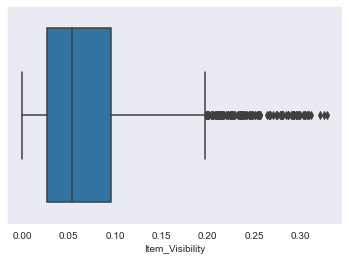

In [28]:
#by the same way let's treat outliers of mpr
sns.boxplot(updated_data_one['Item_Visibility'])

In [30]:
upperr, lowerr = outliers(updated_data_one, "Item_Visibility")
print("Upper whisker: ", upperr)
print("Lower Whisker: ", lowerr)

Upper whisker:  0.19770463800000004
Lower Whisker:  -0.07537746600000003


In [31]:
#let's take look at outliers of Item_visibility
updated_data_one[(updated_data_one['Item_Visibility'] < lower) | (updated_data_one['Item_Visibility'] > upper)]
#remove these outliers from dataset
updated_data_final = remove_outliers(upperr,lowerr,'Item_Visibility',updated_data_one)
updated_data_final

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,dairy,249.8092,out049,1999,medium,tier 1,supermarket type1,3735.1380
1,DRC01,5.920,regular,0.019278,soft drinks,48.2692,out018,2009,medium,tier 3,supermarket type2,443.4228
2,FDN15,17.500,low fat,0.016760,meat,141.6180,out049,1999,medium,tier 1,supermarket type1,2097.2700
3,FDX07,19.200,regular,0.000000,fruits and vegetables,182.0950,out010,1998,small,tier 3,grocery store,732.3800
4,NCD19,8.930,low fat,0.000000,household,53.8614,out013,1987,high,tier 3,supermarket type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,snack foods,214.5218,out013,1987,high,tier 3,supermarket type1,2778.3834
8519,FDS36,8.380,regular,0.046982,baking goods,108.1570,out045,2002,high,tier 2,supermarket type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,health and hygiene,85.1224,out035,2004,small,tier 2,supermarket type1,1193.1136
8521,FDN46,7.210,regular,0.145221,snack foods,103.1332,out018,2009,medium,tier 3,supermarket type2,1845.5976


In [32]:
#Remove outliers from item visibility of test_data
upper_2, lower_2 = outliers(updated_test, "Item_Visibility")
print("Upper whisker: ", upper_2)
print("Lower Whisker: ", lower_2)
#remove these outliers from dataset
updated_test_final = remove_outliers(upper_2,lower_2,'Item_Visibility',updated_test)
updated_test_final

Upper whisker:  0.19308624500000005
Lower Whisker:  -0.07257674700000002


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,low fat,0.007565,snack foods,107.8622,out049,1999,medium,tier 1,supermarket type1
1,FDW14,8.300000,reg,0.038428,dairy,87.3198,out017,2007,small,tier 2,supermarket type1
2,NCN55,14.600000,low fat,0.099575,others,241.7538,out010,1998,high,tier 3,grocery store
3,FDQ58,7.315000,low fat,0.015388,snack foods,155.0340,out017,2007,medium,tier 2,supermarket type1
4,FDY38,12.857645,regular,0.118599,dairy,234.2300,out027,1985,medium,tier 3,supermarket type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,regular,0.013496,snack foods,141.3154,out046,1997,small,tier 1,supermarket type1
5677,FDD47,7.600000,regular,0.142991,starchy foods,169.1448,out018,2009,medium,tier 3,supermarket type2
5678,NCO17,10.000000,low fat,0.073529,health and hygiene,118.7440,out045,2002,medium,tier 2,supermarket type1
5679,FDJ26,15.300000,regular,0.000000,canned,214.6218,out017,2007,high,tier 2,supermarket type1


In [33]:
#still there are nans across outlet_size
#filling the NaNs of outlet_size using categorical imputer of numpy

# handling NaN values
#creates a random permuation of the categorical values
permutation = np.random.permutation(updated_data_final['Outlet_Size'])

#erase the empty values
empty_is = np.where(permutation == "")
permutation = np.delete(permutation, empty_is)

#replace all empty values of the dataframe[field]
end = len(permutation)
updated_data_final['Outlet_Size'] = updated_data_final['Outlet_Size'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)
updated_data_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8196 non-null   object 
 1   Item_Weight                8196 non-null   float64
 2   Item_Fat_Content           8196 non-null   object 
 3   Item_Visibility            8196 non-null   float64
 4   Item_Type                  8196 non-null   object 
 5   Item_MRP                   8196 non-null   float64
 6   Outlet_Identifier          8196 non-null   object 
 7   Outlet_Establishment_Year  8196 non-null   int64  
 8   Outlet_Size                8196 non-null   object 
 9   Outlet_Location_Type       8196 non-null   object 
 10  Outlet_Type                8196 non-null   object 
 11  Item_Outlet_Sales          8196 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 832.4+ KB


<ipython-input-33-bc0a22bb8e51>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data_final['Outlet_Size'] = updated_data_final['Outlet_Size'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)


In [35]:
#check nulls of test data
updated_test_final.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [44]:

#Feature Engineering
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()

features = ["Item_Weight", "Item_Visibility", "Item_MRP","Outlet_Establishment_Year"]
updated_data_final[features] = autoscaler.fit_transform(updated_data_final[features])
updated_test_final[features] = autoscaler.transform(updated_test_final[features])


<ipython-input-44-c2a3b27312e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data_final[features] = autoscaler.fit_transform(updated_data_final[features])
c:\Users\Start\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-44-c2a3b27312e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Now the dataset has been cleaned
#Let's start with preprocessing stage and encoding

In [45]:
x_train=updated_data_final.iloc[:,:-1].values
x=pd.DataFrame(x_train)
y_train=updated_data_final.iloc[:,-1].values
#updated_data_final[['Item_Identifier','Outlet_Identifier' , 'Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']].apply(lambda x: x.astype('category'))
train_feature=one_hot_encoded_training_predictors = pd.get_dummies(x)
test_feature=one_hot_encoded_test_predictors = pd.get_dummies(updated_test_final)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)


final_train=np.array(final_train)
final_test=np.array(final_test)
y_train

#i chacked both infinite and nan !!!!
np.isfinite(final_test.all())
np.isnan(final_test.any())


False

In [41]:
#Apply simple regression model by using sklearn library
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(final_train,y_train)

LinearRegression()

In [42]:
#predict the test results
y_pred=linreg.predict(final_test)
y_pred         #i will try to solve the error and resubmit rest of the project but i checked both nans and infinite actually

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').